# **INET 4061 Lab 4**

# **Author: Sai Tallapragada**
# **Date: 2/14/2021**

# **Overview**
In our Lab, we are trying to understand what factors have a possible influence on devloping diabetes through using Disiease Progression Value which tell us the progression of the disease. In our lab, we are using linear regression and multiple linear regression to study the different factors that may have influence on diabetes. I have used the code provided for Excercise 4 to help complete this lab from the following source([Source1](https://docs.google.com/document/d/1SRvCpvh5R6l4lQa0eGoSQdoYG2331APk84pFgiySfpE/edit)). Finally, the null hypothesis we will be dealing with is the relationship between the model and the target variable(Disease Progression Value) is not significant and the alternative hypothesis is that the relationship is significant.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# **Data**

In [ ]:
# Load the diabetes dataset that is already scaled
diabetes = datasets.load_diabetes()
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


We are getting a diabetes dataset from the sklearn.datasets module. We will be using this dataset throughout this notebook to answer our question of what factors may have an influence on diabestes. We are using import datasets.load_diabetes() to retrieve the dataset we want.

# **Exploratory Data Analysis**

In [ ]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # Converting the Dataset to a pandas Dataframe
print(df.shape) # printing the shape of the data
print(df.head())
print("No Null Values")
num_Null=df.isnull().sum().sort_values(ascending=False) # Checking for Null/ Missing Values.
print(num_Null)
print("\nSummary of Numeric Independent Variables  ")
df.describe()# Summary of all the variables   

(442, 10)
        age       sex       bmi  ...        s4        s5        s6
0  0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1 -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2  0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3 -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4  0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641

[5 rows x 10 columns]
No Null Values
s6     0
s5     0
s4     0
s3     0
s2     0
s1     0
bp     0
bmi    0
sex    0
age    0
dtype: int64

Summary of Numeric Independent Variables  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


According to the shape of the dataframe, there seems to be a total of 442 data values in our dataset. Next, we can also see that there are no null values in our dataset as each of he variables had a count of zero for null values.

**Histogram of Disease Progression value**

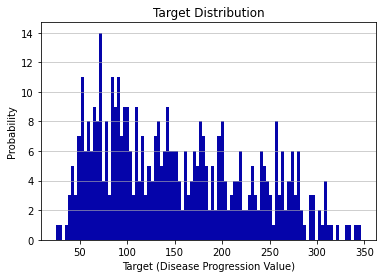

In [ ]:
# The code below prints out the histogram o the disease progression value.
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

Based of the histogram of the target variable which is Disease Progression value, it seems that the distribution of values is right skewed slightly as the peak of the distribution seems to be a little bit to the left side of the histogram.

**BMI Scatterplot**

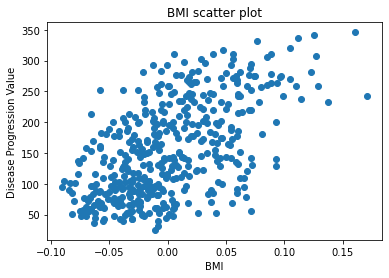

In [ ]:
# Disease Progression Value vs BMI
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

From looking at the scatterplot above, it seems ot me that BMI and the Disease Progression Value have a positve correlation. After 0.10 on BMI scale, it seems that the points are more spread and not as condense as the points between -0.10 and 0.10.

**Correlation Matrix**

In [ ]:
print("\nCorrelation Matrix is Printed below")
print(df.corr())


Correlation Matrix is Printed below
          age       sex       bmi  ...        s4        s5        s6
age  1.000000  0.173737  0.185085  ...  0.203841  0.270777  0.301731
sex  0.173737  1.000000  0.088161  ...  0.332115  0.149918  0.208133
bmi  0.185085  0.088161  1.000000  ...  0.413807  0.446159  0.388680
bp   0.335427  0.241013  0.395415  ...  0.257653  0.393478  0.390429
s1   0.260061  0.035277  0.249777  ...  0.542207  0.515501  0.325717
s2   0.219243  0.142637  0.261170  ...  0.659817  0.318353  0.290600
s3  -0.075181 -0.379090 -0.366811  ... -0.738493 -0.398577 -0.273697
s4   0.203841  0.332115  0.413807  ...  1.000000  0.617857  0.417212
s5   0.270777  0.149918  0.446159  ...  0.617857  1.000000  0.464670
s6   0.301731  0.208133  0.388680  ...  0.417212  0.464670  1.000000

[10 rows x 10 columns]


Further more, we have a correlation matrix printed above which inlcudes all of our indepnedent variables. It seems that there a few variables pairs like bmi and s5(0.446159) or s1 and s5(0.515501) which seem to have correlation of atleast .40 between them. I think that there is little bit of a collinearity issue between the variables because we are seeing numbers greater than 0.4 and 0.5 for correlation.

# **Models**

In [ ]:
# Linear Regression Model

diabetes_X = np.array(df.bmi).reshape(-1,1)
diabetes_y = diabetes.target

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)  

# R squared
print('\nVariance score (R squared): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())

 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())
print("Coefficient: ", regr.coef_)# Coefficient of our Regression Model
print("y intercept",regr.intercept_) # The y intercept of our regression model.



Variance score (R squared): 0.47
Mean squared error: 2548.07
Root mean squared error: 50.48

Mean of diabetes target variable =  126.2
RMSE percentage of diabetes mean =  39.998759894526835
Coefficient:  [938.23786125]
y intercept 152.91886182616167


### **How Accurate is our linear regression model based of our results?**
The Formula of the regression line we got from our model is y=938.23786x + 152.918862. From the linear regression model, we received a Variance of 0.47. This means that only 47% of the variance that has occured in the our target response variable(Disease Progression Value) can be explained by the input. Thus, we can see that our linear regression model has not performed that well due to the variance being 0.47. Even more, the RMSE percentage of the diabetes mean is 39.998 and the actual mean itself is 126.2. We can see that the error in our model is large and that our model was not that accurate as the residual distance between the actual data points and residual data points for our linear regression model was large. Even more, the R-squared(variance) value is .47 and that tells us that the estimatred strength of the relationship between the model and the response variable(Disease Progression Value) is not that strong.


In [ ]:
#Multiple Regression

import statsmodels.api as sm

diabetes_X = diabetes.data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)

colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
print(df_tbl)
 

#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
print(lm2.summary())

print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
  Columns  Coefficients
0     age      0.303500
1     sex   -237.639315
2     bmi    510.530605
3      bp    327.736980
4      s1   -814.131709
5      s2    492.814588
6      s3    102.848452
7      s4    184.606489
8      s5    743.519617
9      s6     76.095172
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           4.64e-58
Time:                        04:40:04   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df 

In [ ]:
# Gets the Coefficents, pvalues, and significance(True/ False) for every intdependent variable based on the multile linear regression model with all the independent variables.
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = lm2.params[1:])
df_var = pd.DataFrame( data = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])
df_p = pd.DataFrame( data = lm2.pvalues[1:])
df_tbl =  pd.concat ( [df_var, df_col, df_coef, df_p] , axis = 1 )
df_tbl.columns = [' Model Variable', 'Variable Name', 'Coefficients', 'P-Value']
alpha = 0.05
df_tbl['significant'] = df_tbl['P-Value'] < alpha
df_tbl

,Model Variable,Variable Name,Coefficients,P-Value,significant
0,x1,age,0.303500,9.960511e-01,False
1,x2,sex,-237.639315,1.787768e-04,True
2,x3,bmi,510.530605,4.230966e-13,True
3,x4,bp,327.736980,1.376978e-06,True
4,x5,s1,-814.131709,5.555949e-02,False
5,x6,s2,492.814588,1.530022e-01,False
6,x7,s3,102.848452,6.395776e-01,False
7,x8,s4,184.606489,2.705814e-01,False
8,x9,s5,743.519617,2.763327e-05,True
9,x10,s6,76.095172,2.658265e-01,False


### **How accurate is our multiple linear regression model?**
The formula of the regression line for our multiple regression model is y=152.7643 + 0.3035x1-237.6393x2+510.530605x3+327.736980x4 -814.131709x5 + 492.814588x6 + 102.848452x7+ 184.606489x8+ 743.519617x9 + 76.095172 x10. Even more, it seems that age is not a signinfcant factor unlike sex,bmi, and bp. Additionally, from our results, we can see that our R-square(Variance) value is .512 and it is higher than than the .47 we got when we just did linear regression. Further more, the probability of the Fstatistic is 4.64e-58. This tells me that the relationship between the model and the target variable(Disease Progression Value) is signinifcant at the signinfncance level of .05.

### **Removing Interating Features to build a New Multiple Linear Regression Model**
I removed the interacting features based on whether or not they are siginifcant using the Table above where it tells us which variables are signinficant. I removed the insignificant variables which are interacting with each other based on my observation.

In [ ]:


#Multiple Regression

import statsmodels.api as sm
from scipy import stats

# Removing the columns of variables which are interacting.
diabetes_X = diabetes.data
diabetes_X=np.delete(diabetes.data,[0,4,5,6,7,9],axis=1)
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 


# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)

colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
print(df_tbl)
 

#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
print(lm2.summary())

print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )

Coefficients: 
 [-131.8626081   593.16210105  298.1175092   547.05556785]
  Columns  Coefficients
0     age   -131.862608
1     sex    593.162101
2     bmi    298.117509
3      bp    547.055568
4      s1           NaN
5      s2           NaN
6      s3           NaN
7      s4           NaN
8      s5           NaN
9      s6           NaN
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     96.12
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           6.96e-58
Time:                        04:59:57   Log-Likelihood:                -2294.7
No. Observations:                 422   AIC:                             4599.
Df Residuals:                     417   BIC:                             4620.
Df Model:                     

In [ ]:
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = lm2.params[1:])
df_var = pd.DataFrame( data = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])
df_p = pd.DataFrame( data = lm2.pvalues[1:])
df_tbl =  pd.concat ( [df_var, df_col, df_coef, df_p] , axis = 1 )
df_tbl.columns = [' Model Variable', 'Variable Name', 'Coefficients', 'P-Value']
alpha = 0.05
df_tbl['significant'] = df_tbl['P-Value'] < alpha
df_tbl

,Model Variable,Variable Name,Coefficients,P-Value,significant
0,x1,age,-131.862608,2.579295e-02,True
1,x2,sex,593.162101,8.138170e-18,True
2,x3,bmi,298.117509,6.808035e-06,True
3,x4,bp,547.055568,1.203517e-15,True
4,x5,s1,NaN,NaN,False
5,x6,s2,NaN,NaN,False
6,x7,s3,NaN,NaN,False
7,x8,s4,NaN,NaN,False
8,x9,s5,NaN,NaN,False
9,x10,s6,NaN,NaN,False


**How Accurate is our new multiple linear regression model after we remove the outliers?**

The formula of the regression line for our multiple regression model is y=152.7643 + -131.8626081x1+ 593.16210105 x2 +  298.1175092x3 + 547.05556785x4. The root mean squared error for our new model(44.40) after removing the intereacting features is slightly lower than the original multiple linear reression model(44.77). The probability of the F statistic for our new model is 6.96e-58 and this tells me that the relationship between the model and the target variable(Disease Progression Value) is signinifcant at the signinfncance level of .05.


# **Conclusions**

Through our first model which was just Linear regression, we recieved a variance of .47 and RMSE percentage of the diabetes mean to be 39.998759894526835%. This showed us that our linear regression model has not performed that well due to the variance being 0.47 as that means that  only 47% of the variance that has occured in the our target response variable(Disease Progression Value) can be explained by the input. Our linear regression model was not accurate. 

Next, we did multiple linear regression and we see that our variance has gone up to .512 and this is a clear increase over the linear regression model which had a variance of (0.47). Furthermore, the probability of the Fststistic for the multiple linear regression model was 4.64e-58 and this shows us that the relationship between the model and the target variable(Disease Progression Value) is signinifcant at the signinfncance level of .05. We also printed out the signifncance of the each independtnt variable based o its pvalue for the multiple linear regression model. It showed us that the age variable was not signinfcant but the sex, bmi, and bp variables were signinfcant in terms of their influence on the target variable(Diasease Progression Value).

Lastly, I removed interacting features manually based on whether they were signinfcant or not to create a new multiple linear regression model towards the end of the notebook. However, the variance of this new model was 0.48. It was lowed than the orginal variance of the multiple linear regression model(0.512). Further more, the rotmean squared error of the new model(44.40) and the orginal multiple linear regression mode(44.77) were relatively the same. The probability of the F statistic for our new model is 6.96e-58 and this tells me that the relationship between the model and the target variable(Disease Progression Value) is signinifcant at the signinfncance level of .05.

Overall, the orginal multiple linear regression model did the best because the variance was the highest for that model(.512) and this means that 51% of the vairance that has occured in the multiple linear regression model can be explained. Based of the results from the orginal multiple linear regression model, I would say that the main signinfcant variables that have a influcne on diabetes are sex, bmi, and bp. However, we have to notice that our variance was only 0.512 for the original multiple linear regression model so that shows that our model was not very accurate and that only 51.2% of the variance that has occured can be explained by the input. Thus, I would say that we would need to build a better model where the RMSE would be lower and the variance can be much higher in order to get more concreate and accurate results.
